In [16]:
import numpy as np 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import Q1
import Q2
import Q3

# Problem 1

To represent a cylinder in 3D space in a box, we can look at its cross sectional area and solve this problem in 2D since we know that the electric field and potential only depend on $\vec{r}$. Therefore, the behaviour around the cylinder will be the same everywhere along the z-axis. $\textbf{NOTE: electric field and potential are not normalized, behavior should be the same however.}$

Let's define the parameters of our problem below.

In [17]:
n = 1024             #Pixel size
R = 200              #Radius of cylinder
pot = 1              #Potential of the cylinder
maxIter = 10000      #Maximum iteration before relaxation method stops
thresh = 1e-2        #threshold in how precise we want the potential to be 

In [18]:
#Does the masking and initializes the boundary conditions
V,bc,mask,x,y = Q1.cylinder(n,R,pot)

#Calculates the expected potential
V_true = Q1.true_V(x,y,R,n,pot,bc,mask)

For the first problem, we are interested in solving this using the relaxation method. Below, I call the function in file Q1.py and display the results,

In [4]:
Q1.relaxation(V,bc,mask,maxIter=maxIter,thresh=thresh)
d = Q1.density(V,mask)

The relaxation method converged after 2201 iterations.This algorithm converged in 149.50470852851868s


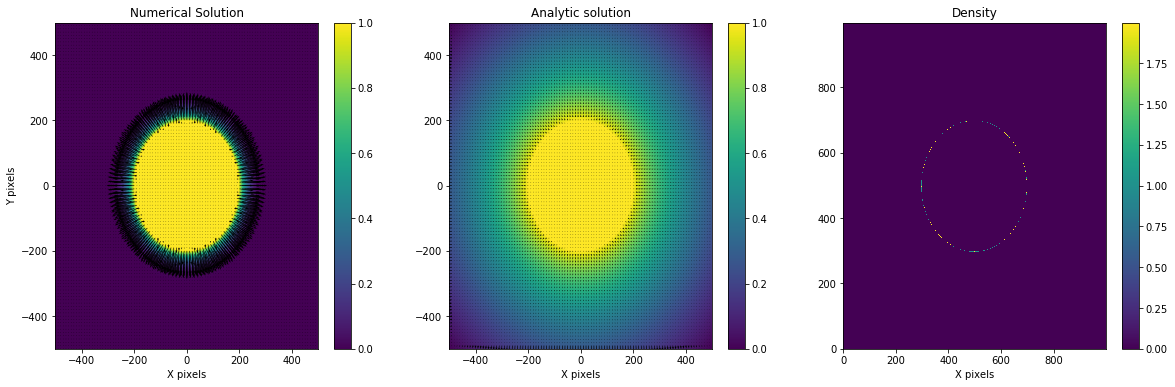

In [5]:
Q1.plot_three_results(V,V_true,d,10,x,y)

The electric field points outwards as expected. Moreover, the charge density is all on the boundary, as expected.

To get the charge per unit length, we can sum all the charge densities and divide by the circumference of the circle, 

In [6]:
charge_density = np.sum(d)/ (2*np.pi*R)
print (f"The charge per unit length was found to be {charge_density}")

The charge per unit length was found to be 1.2500033209062313


#### Overall comments: 

General behaviour of both the theoritical and simulated are very similar; both decay from the cylinder. That said, the electric field from the simulated is rougher and decays much faster than the analytic solution. This is because the simulated electric field has rougher variations (by-product of the relaxation method). This can be fixed using the conjugate gradient method, which is the next problem actually. 

# Problem 2

Let's initialize the space again along with the boundary conditions so we can have a fair comparison with Problem 1. 

In [7]:
#Does the masking and initializes the boundary conditions
V,bc,mask,x,y = Q1.cylinder(n,R,pot)

Calling the conjugate gradient formula defined in Q2.py

In [8]:
V = Q2.cg(bc,mask,V0=V)
d = Q1.density(V,mask)

The conjugate gradient converged in 16.594130277633667s after 446 iterations


Plotting the results, we now get,

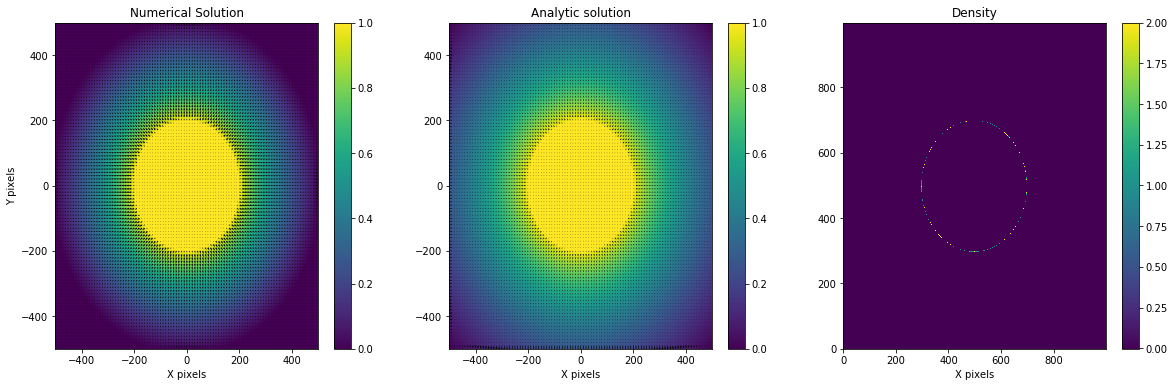

In [9]:
Q1.plot_three_results(V,V_true,d,10,x,y)

As printed above, the conjugate method took about 445 iterations while the relaxation method took 2200 iterations. Consequently, this measn that it is also faster. The conjugate method is about 90% faster and takes 80% less iterations. Moreover, the simulated solution is now much more smoother and very similar to the analytic solution compared to problem 1.  

We can also calculate the charge per unit length,

In [10]:
charge_density = np.sum(d)/(2*np.pi*R)
print (f"The charge per unit length was found to be {charge_density}")

The charge per unit length was found to be 1.2738924575584745


This did not really change much from before, but it is interesting to see the difference.

# Problem 3

Let us try to implement the solver to work on a range of resolutions. First, defining the structure and space again, 

In [32]:
#Does the masking and initializes the boundary conditions
V,bc,mask,x,y = Q1.cylinder(n,R,pot)

Below I call the function res_cg which implements what we want. This can be found in Q3.py along with functions to increase or decrease the resolution (I also calculate a new density for comparison reasons),

In [33]:
V = res_cg(bc,mask)
d = Q1.density(V,mask)

The conjugate gradient converged in 0.000997304916381836s after 19 iterations
The conjugate gradient converged in 0.0009970664978027344s after 5 iterations
The conjugate gradient converged in 0.0009970664978027344s after 3 iterations
The conjugate gradient converged in 0.002992391586303711s after 1 iterations
The conjugate gradient converged in 0.020943880081176758s after 0 iterations
The conjugate gradient converged in 0.1047203540802002s after 0 iterations
Changing the resolution, the conjugate gradient took 6.195432901382446s with 28 iterations


Plotting the results, we get

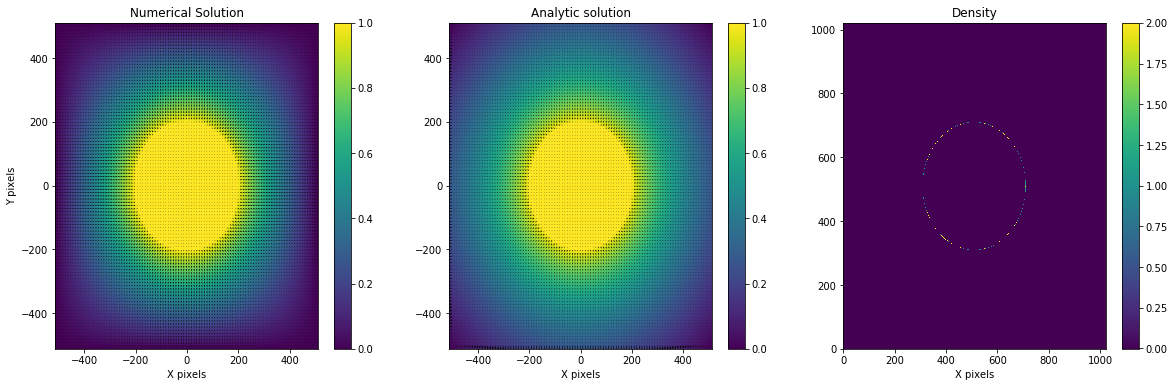

In [34]:
Q1.plot_three_results(V,V_true,d,10,x,y)

Using this method of increasing and decreasing resolution allowed the solver to solve it from 16.5s to about 6.2s. This method also yields a much more accurate numerical solution (as seen from above) compared to Problem 2. 

In [36]:
charge_density = np.sum(d)/(2*np.pi*R)
print (f"The charge per unit length was found to be {charge_density}")

The charge per unit length was found to be 1.2799912600514385


Charge density really did not change much...Coolio

# Problem 4

In this problem, we are going to add a small bump with a given radius and angular position on the surface. I will define it so the center of the bump is on the circumference of the circle. 